In [1]:
#import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
from sklearn import metrics

In [2]:
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("datas.csv")
data.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [4]:
data.shape

(11055, 32)

In [5]:
data.columns

Index(['index', 'having_IPhaving_IP_Address', 'URLURL_Length',
       'Shortining_Service', 'having_At_Symbol', 'double_slash_redirecting',
       'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State',
       'Domain_registeration_length', 'Favicon', 'port', 'HTTPS_token',
       'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH',
       'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'on_mouseover',
       'RightClick', 'popUpWidnow', 'Iframe', 'age_of_domain', 'DNSRecord',
       'web_traffic', 'Page_Rank', 'Google_Index', 'Links_pointing_to_page',
       'Statistical_report', 'Result'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   index                        11055 non-null  int64
 1   having_IPhaving_IP_Address   11055 non-null  int64
 2   URLURL_Length                11055 non-null  int64
 3   Shortining_Service           11055 non-null  int64
 4   having_At_Symbol             11055 non-null  int64
 5   double_slash_redirecting     11055 non-null  int64
 6   Prefix_Suffix                11055 non-null  int64
 7   having_Sub_Domain            11055 non-null  int64
 8   SSLfinal_State               11055 non-null  int64
 9   Domain_registeration_length  11055 non-null  int64
 10  Favicon                      11055 non-null  int64
 11  port                         11055 non-null  int64
 12  HTTPS_token                  11055 non-null  int64
 13  Request_URL                  11055 non-null  i

In [7]:
data.nunique()

index                          11055
having_IPhaving_IP_Address         2
URLURL_Length                      3
Shortining_Service                 2
having_At_Symbol                   2
double_slash_redirecting           2
Prefix_Suffix                      2
having_Sub_Domain                  3
SSLfinal_State                     3
Domain_registeration_length        2
Favicon                            2
port                               2
HTTPS_token                        2
Request_URL                        2
URL_of_Anchor                      3
Links_in_tags                      3
SFH                                3
Submitting_to_email                2
Abnormal_URL                       2
Redirect                           2
on_mouseover                       2
RightClick                         2
popUpWidnow                        2
Iframe                             2
age_of_domain                      2
DNSRecord                          2
web_traffic                        3
P

In [9]:
data = data.drop(['index'],axis = 1)

In [10]:
#visualzing the data

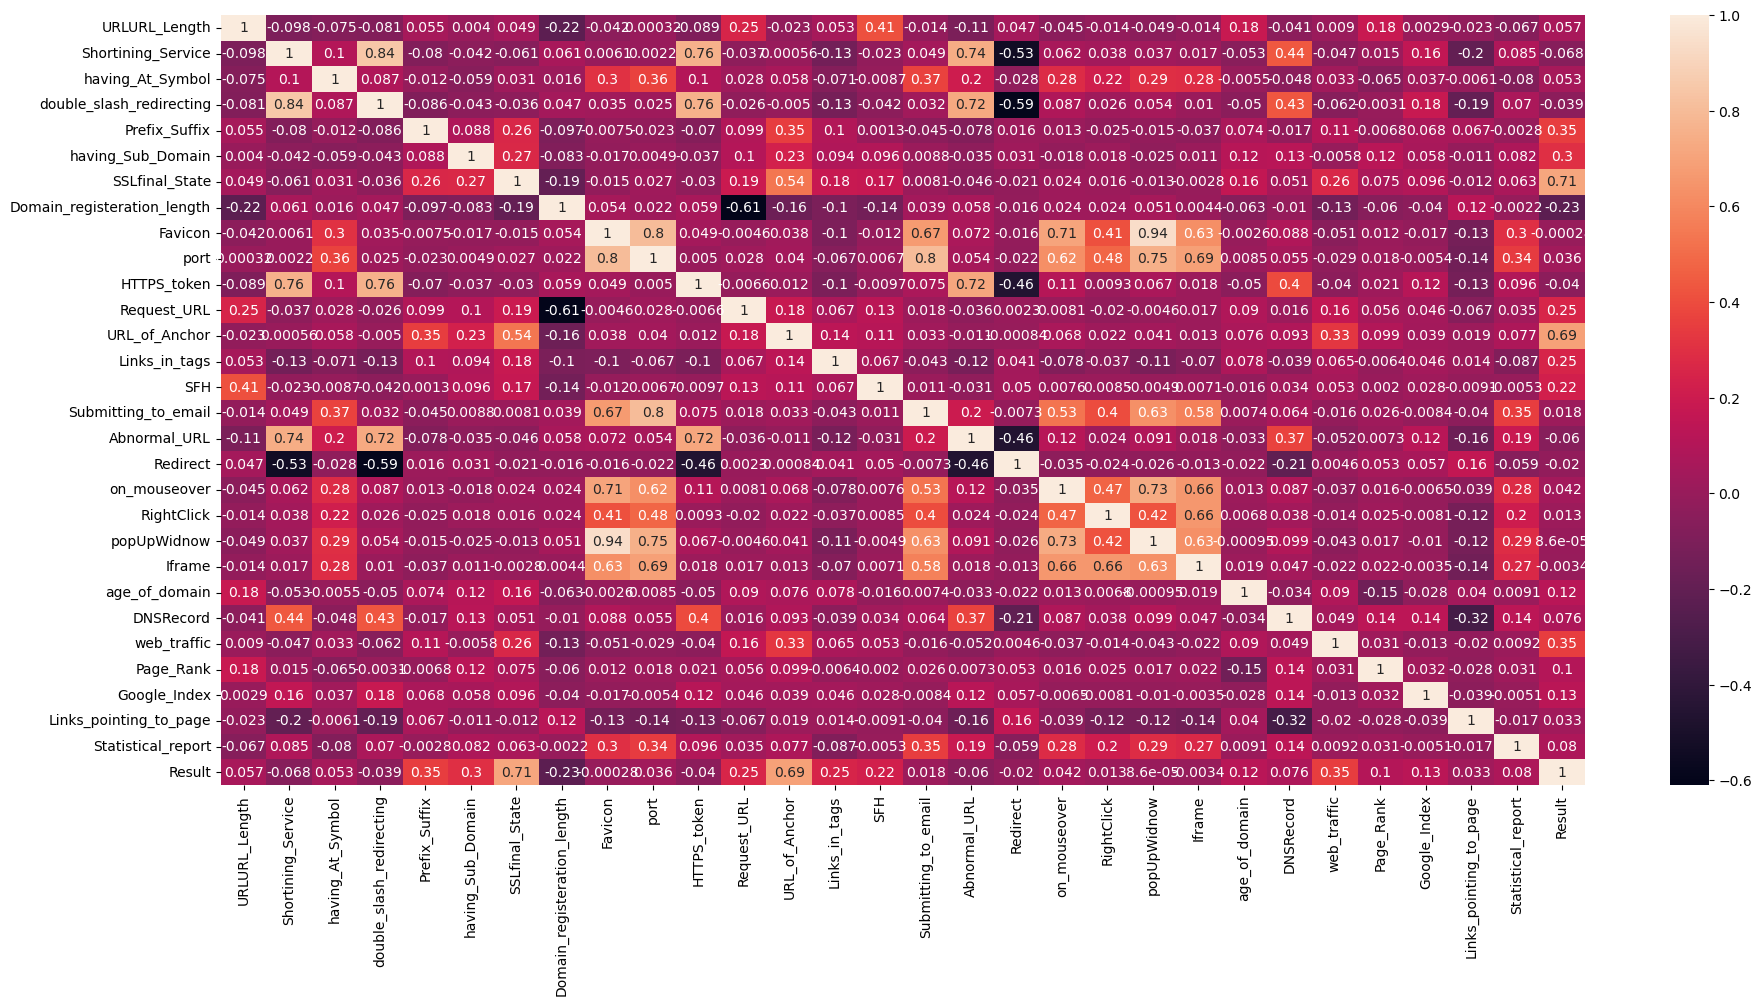

In [25]:
plt.figure(figsize=(22,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

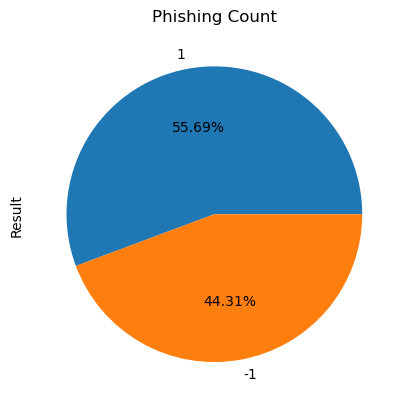

In [13]:
# Phishing Count in pie chart

data['Result'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title("Phishing Count")
plt.show()

In [15]:
# Remove the first column (index 0)
data = data.iloc[:, 1:]

data.head()

,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,1,1,-1,-1,-1,-1,-1,1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,-1,0,1,-1,1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,0,1,1,1,-1,-1,-1,-1,1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,0,1,1,1,-1,-1,-1,1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,0,-1,1,1,-1,1,1,-1,1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


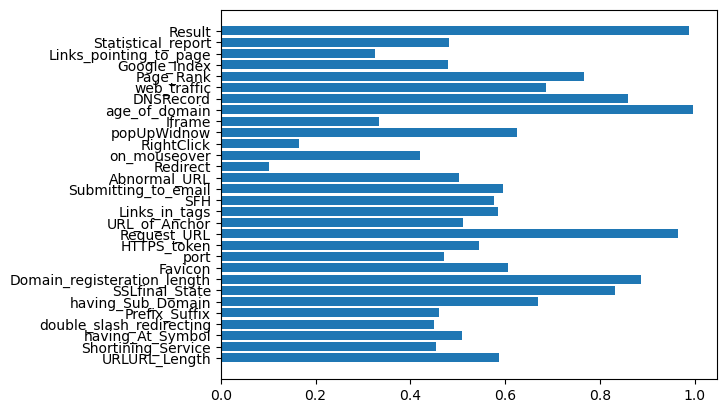

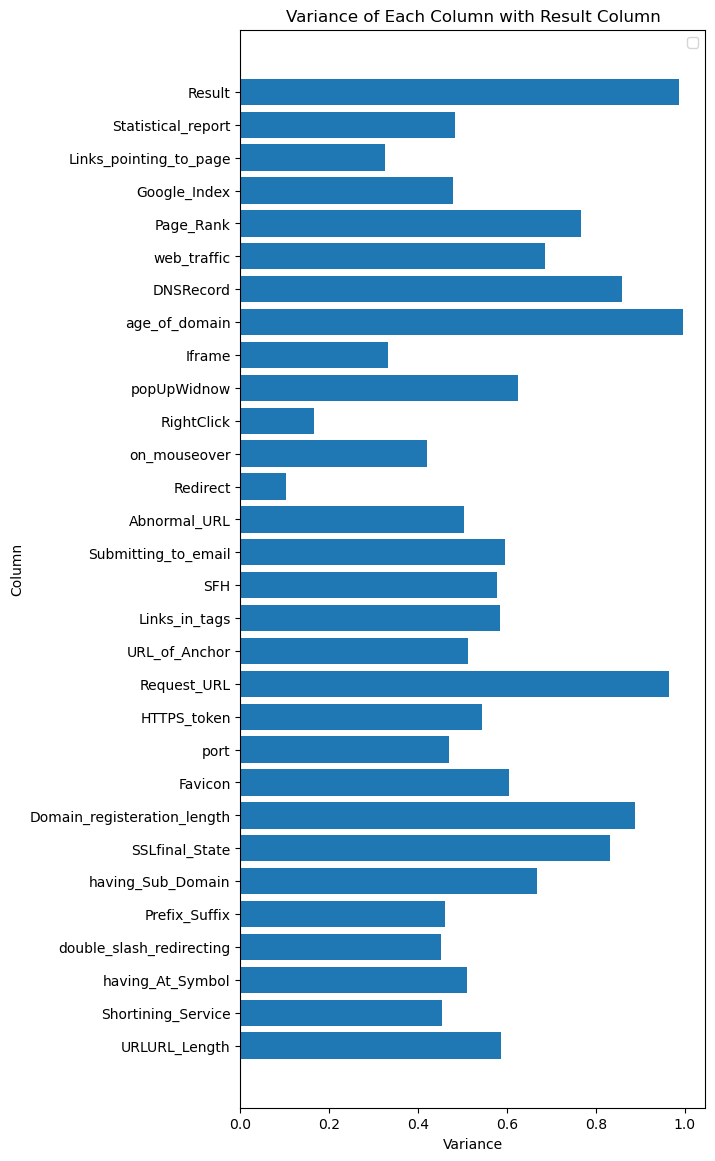

In [17]:
# Calculate the variance of each column
variances = data.var()

# Create a horizontal bar chart
plt.barh(variances.index, variances.values)

# Create a horizontal bar chart
fig, ax = plt.subplots(figsize=(6, 14)) # Set the figure size
ax.barh(variances.index, variances.values)

# Add a vertical line for the result column
result_val = data['Result'].iloc[-1]
# ax.axvline(result_val, color='r', linestyle='--', label='Result')

# Label the chart and axes
ax.set_title('Variance of Each Column with Result Column')
ax.set_xlabel('Variance')
ax.set_ylabel('Column')
ax.legend()

# Display the chart
plt.show()

In [19]:
corr_matrix = data.corr()
corr_table = corr_matrix.style.background_gradient(cmap='coolwarm')
corr_table

,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
URLURL_Length,1.000000,-0.097881,-0.075108,-0.081247,0.055247,0.003997,0.048754,-0.221892,-0.042497,0.000323,-0.089383,0.246348,-0.023396,0.052869,0.414196,-0.014457,-0.106761,0.046832,-0.045103,-0.013613,-0.049381,-0.013838,0.179426,-0.040823,0.008993,0.183518,0.002902,-0.022987,-0.067153,0.057430
Shortining_Service,-0.097881,1.000000,0.104447,0.842796,-0.080471,-0.041916,-0.061426,0.060923,0.006101,0.002201,0.757838,-0.037235,0.000561,-0.133379,-0.022723,0.049328,0.739290,-0.534530,0.062383,0.038118,0.036616,0.016581,-0.052596,0.436064,-0.047074,0.014591,0.155844,-0.198410,0.085461,-0.067966
having_At_Symbol,-0.075108,0.104447,1.000000,0.086960,-0.011726,-0.058976,0.031220,0.015522,0.304899,0.364891,0.104561,0.027909,0.057914,-0.070861,-0.008672,0.370123,0.203945,-0.028160,0.279697,0.219503,0.290893,0.284410,-0.005499,-0.047872,0.032918,-0.064735,0.037061,-0.006080,-0.080357,0.052948
double_slash_redirecting,-0.081247,0.842796,0.086960,1.000000,-0.085590,-0.043079,-0.036200,0.047464,0.035100,0.025060,0.760799,-0.026368,-0.005036,-0.125583,-0.041672,0.031898,0.723724,-0.591478,0.086635,0.025863,0.054463,0.010459,-0.050107,0.431409,-0.062369,-0.003132,0.178415,-0.194165,0.070390,-0.038608
Prefix_Suffix,0.055247,-0.080471,-0.011726,-0.085590,1.000000,0.087891,0.261391,-0.096799,-0.007504,-0.022546,-0.070153,0.098675,0.348871,0.100254,0.001326,-0.045000,-0.077620,0.016271,0.012578,-0.024868,-0.014733,-0.036904,0.074116,-0.016556,0.110598,-0.006834,0.067781,0.067423,-0.002763,0.348606
having_Sub_Domain,0.003997,-0.041916,-0.058976,-0.043079,0.087891,1.000000,0.267649,-0.082839,-0.016704,0.004863,-0.037239,0.104857,0.229491,0.093646,0.096089,0.008830,-0.034908,0.031206,-0.018082,0.018230,-0.025312,0.010637,0.119254,0.125493,-0.005764,0.120730,0.057673,-0.010526,0.081627,0.298323
SSLfinal_State,0.048754,-0.061426,0.031220,-0.036200,0.261391,0.267649,1.000000,-0.193622,-0.014757,0.027473,-0.029941,0.193054,0.535786,0.176825,0.171402,0.008062,-0.046245,-0.021070,0.023586,0.015854,-0.013005,-0.002773,0.162809,0.050972,0.258768,0.074545,0.096051,-0.011710,0.063411,0.714741
Domain_registeration_length,-0.221892,0.060923,0.015522,0.047464,-0.096799,-0.082839,-0.193622,1.000000,0.054253,0.022478,0.059161,-0.609970,-0.160257,-0.101084,-0.136422,0.039260,0.058109,-0.016300,0.023784,0.023520,0.051410,0.004393,-0.062851,-0.010477,-0.134454,-0.059898,-0.039766,0.122672,-0.002212,-0.225789
Favicon,-0.042497,0.006101,0.304899,0.035100,-0.007504,-0.016704,-0.014757,0.054253,1.000000,0.803834,0.049483,-0.004620,0.037698,-0.100341,-0.012279,0.668317,0.071848,-0.015621,0.706179,0.414382,0.939633,0.627607,-0.002628,0.088211,-0.050922,0.011699,-0.016668,-0.127243,0.300917,-0.000280
port,0.000323,0.002201,0.364891,0.025060,-0.022546,0.004863,0.027473,0.022478,0.803834,1.000000,0.004999,0.027561,0.039891,-0.066502,0.006672,0.799088,0.054126,-0.022472,0.623298,0.481631,0.748517,0.687044,0.008459,0.054849,-0.028543,0.017954,-0.005413,-0.139104,0.343987,0.036419


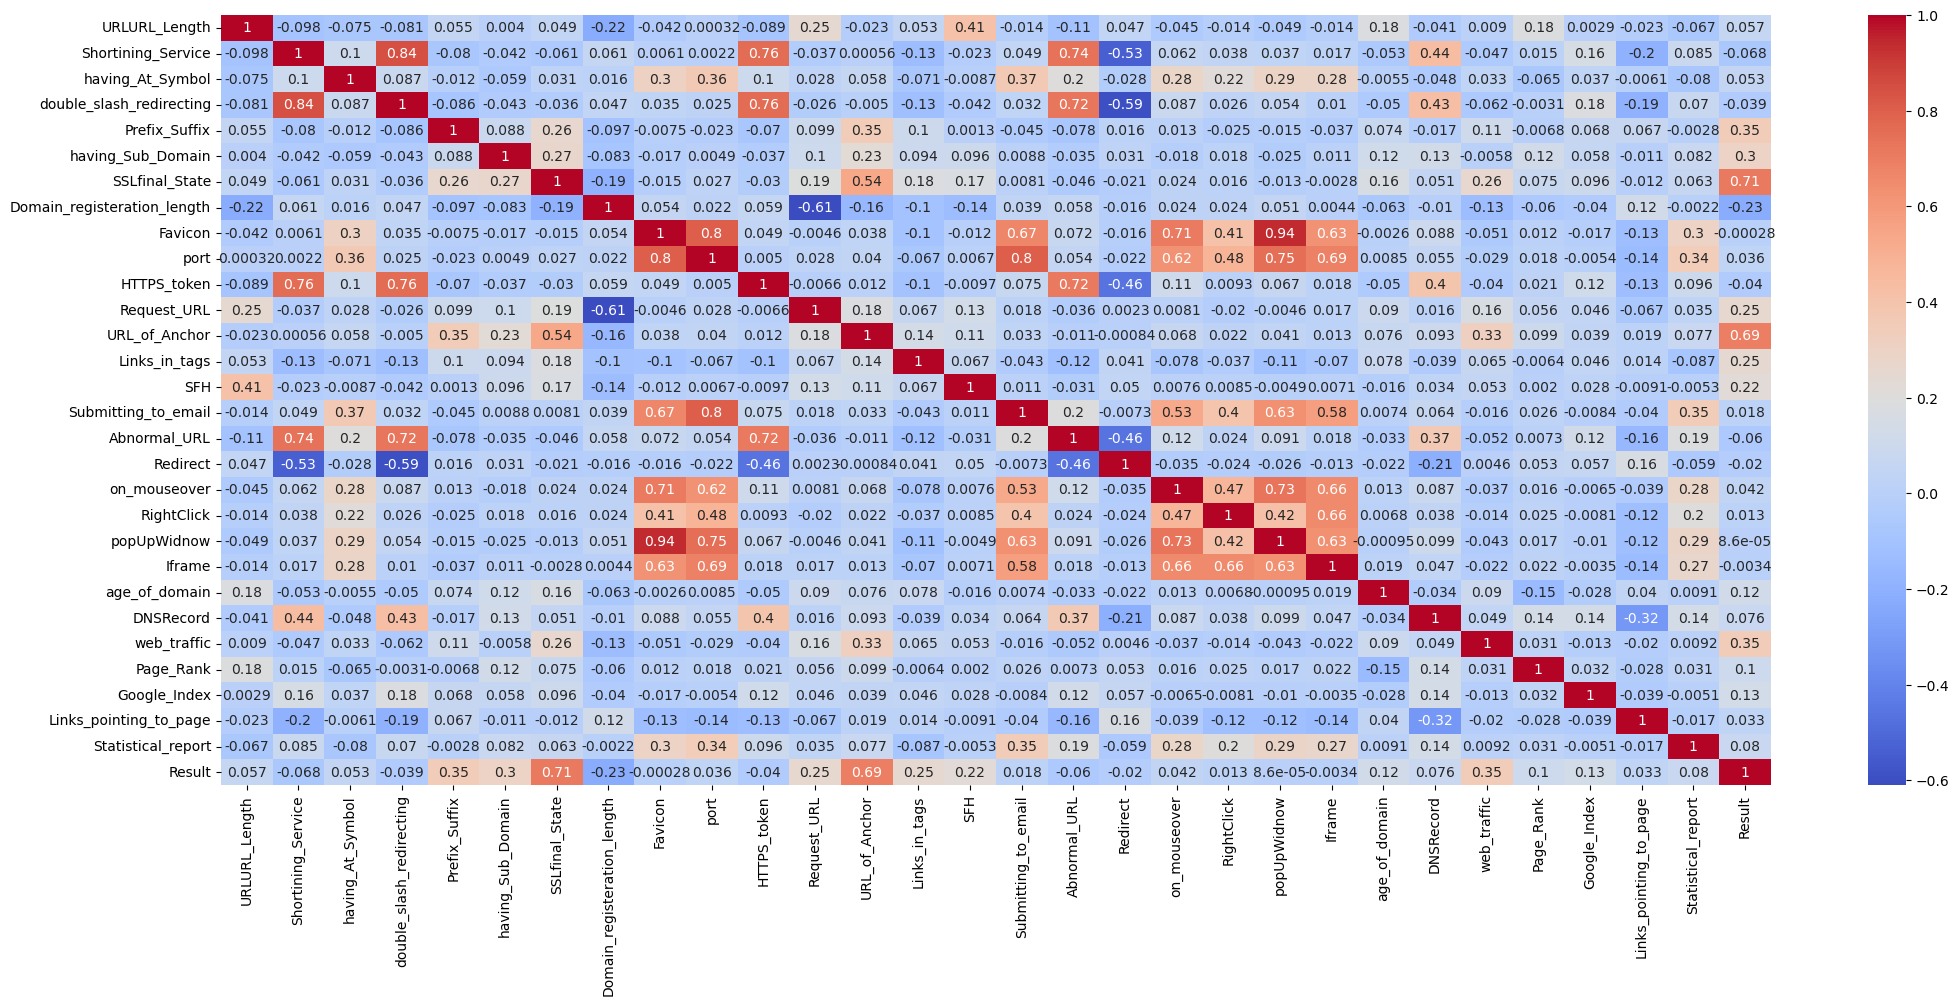

In [23]:
plt.figure(figsize=(25, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()